KHỞI TẠO THƯ VIỆN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

TẢI DỮ LIỆU

In [3]:
df = pd.read_csv('cause_of_deaths.csv')


Hiển thị thông tin ban đầu

In [4]:
df.head(10)

Country/Territory Code  Year  Meningitis  \
0       Afghanistan  AFG  1990        2159   
1       Afghanistan  AFG  1991        2218   
2       Afghanistan  AFG  1992        2475   
3       Afghanistan  AFG  1993        2812   
4       Afghanistan  AFG  1994        3027   
5       Afghanistan  AFG  1995        3102   
6       Afghanistan  AFG  1996        3193   
7       Afghanistan  AFG  1997        3304   
8       Afghanistan  AFG  1998        3281   
9       Afghanistan  AFG  1999        3200   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   
5                                     1225                  394   
6                                     1239                  398   
7                                     1253                  402   
8                                     1267                  405   
9                                     1281                  409   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  ...  \
0                      2087       93      1370                    1538  ...   
1                      2153      189      1391                    2001  ...   
2                      2441      239      1514                    2299  ...   
3                      2837      108      1687                    2589  ...   
4                      3081      211      1809                    2849  ...   
5                      3131      175      1881                    2969  ...   
6                      3175      175      1969                    3331  ...   
7                      3250      240      2078                    3028  ...   
8                      3193      563      2098                    3098  ...   
9                      3115      468      2084                    2917  ...   

   Diabetes Mellitus  Chronic Kidney Disease  Poisonings  \
0               2108                    3709         338   
1               2120                    3724         351   
2               2153                    3776         386   
3               2195                    3862         425   
4               2231                    3932         451   
5               2248                    3974         467   
6               2298                    4041         485   
7               2347                    4094         504   
8               2388                    4120         505   
9               2437                    4150         502   

   Protein-Energy Malnutrition  Road Injuries  Chronic Respiratory Diseases  \
0                         2054           4154                          5945   
1                         2119           4472                          6050   
2                         2404           5106                          6223   
3                         2797           5681                          6445   
4                         3038           6001                          6664   
5                         3087           6211                          6823   
6                         3130           6446                          7000   
7                         3203           6677                          7168   
8                         3145           6683                          7287   
9                         3068           6603                          7400   

   Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
0                                        2673                5005   
1                                        2728                5120   
2                                        2830                5335   
3                                        2943                5568   
4          

In [5]:
df.describe()

Year    Meningitis  Alzheimer's Disease and Other Dementias  \
count  6120.000000   6120.000000                              6120.000000   
mean   2004.500000   1719.701307                              4864.189379   
std       8.656149   6672.006930                             18220.659072   
min    1990.000000      0.000000                                 0.000000   
25%    1997.000000     15.000000                                90.000000   
50%    2004.500000    109.000000                               666.500000   
75%    2012.000000    847.250000                              2456.250000   
max    2019.000000  98358.000000                            320715.000000   

       Parkinson's Disease  Nutritional Deficiencies        Malaria  \
count          6120.000000               6120.000000    6120.000000   
mean           1173.169118               2253.600000    4140.960131   
std            4616.156238              10483.633601   18427.753137   
min               0.000000                  0.000000       0.000000   
25%              27.000000                  9.000000       0.000000   
50%             164.000000                119.000000       0.000000   
75%             609.250000               1167.250000     393.000000   
max           76990.000000             268223.000000  280604.000000   

            Drowning  Interpersonal Violence  Maternal Disorders  \
count    6120.000000             6120.000000         6120.000000   
mean     1683.333170             2083.797222         1262.589216   
std      8877.018366             6917.006075         6057.973183   
min         0.000000                0.000000            0.000000   
25%        34.000000               40.000000            5.000000   
50%       177.000000              265.000000           54.000000   
75%       698.000000              877.000000          734.000000   
max    153773.000000            69640.000000       107929.000000   

            HIV/AIDS  ...  Diabetes Mellitus  Chronic Kidney Disease  \
count    6120.000000  ...        6120.000000             6120.000000   
mean     5941.898529  ...        5138.704575             4724.132680   
std     21011.962487  ...       16773.081040            16470.429969   
min         0.000000  ...           1.000000                0.000000   
25%        11.000000  ...         236.000000              145.750000   
50%       136.000000  ...        1087.000000              822.000000   
75%      1879.000000  ...        2954.000000             2922.500000   
max    305491.000000  ...      273089.000000           222922.000000   

         Poisonings  Protein-Energy Malnutrition  Road Injuries  \
count   6120.000000                  6120.000000    6120.000000   
mean     425.013399                  1965.994281    5930.795588   
std     2022.640521                  8255.999063   24097.784291   
min        0.000000                     0.000000       0.000000   
25%        6.000000                     5.000000     174.750000   
50%       52.500000                    92.000000     966.500000   
75%      254.000000                  1042.500000    3435.250000   
max    30883.000000                202241.000000  329237.000000   

       Chronic Respiratory Diseases  \
count                  6.120000e+03   
mean                   1.709237e+04   
std                    1.051572e+05   
min                    1.000000e+00   
25%                    2.890000e+02   
50%                    1.689000e+03   
75%                    5.249750e+03   
max                    1.366039e+06   

       Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
count                                 6120.000000         6120.000000   
mean                                  6124.072059        10725.267157   
std                                  20688.118580        37228.051096   
min                                      0.000000            0.000000   
25%                                    154.000000          284.000000   
50%                     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [7]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [8]:
df.shape

(6120, 34)

In [9]:
df["Meningitis"].max()

np.int64(98358)

In [10]:
df["Alzheimer's Disease and Other Dementias"].min()

np.int64(0)

In [11]:
unique_years=len(df['Year'].unique())
print("Year:",unique_years)

Year: 30


In [12]:
unique_Country=len(df['Country/Territory'].unique())
print("Country/Territory:",unique_Country)

Country/Territory: 204


Làm sạch và xử lý dữ liệu: Để làm sạch và tổ chức tập dữ liệu, bạn có thể sử dụng các thư viện Python như Pandas và NumPy.

Xử lý giá trị thiếu

In [13]:
# Kiểm tra xem có giá trị nào cho null không.
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [14]:
# Tìm dữ liệu bị thiếu.
Missing_values = df.isnull()
for column in Missing_values.columns.values.tolist():
    print(Missing_values[column].value_counts())
    print("")

Country/Territory
False    6120
Name: count, dtype: int64

Code
False    6120
Name: count, dtype: int64

Year
False    6120
Name: count, dtype: int64

Meningitis
False    6120
Name: count, dtype: int64

Alzheimer's Disease and Other Dementias
False    6120
Name: count, dtype: int64

Parkinson's Disease
False    6120
Name: count, dtype: int64

Nutritional Deficiencies
False    6120
Name: count, dtype: int64

Malaria
False    6120
Name: count, dtype: int64

Drowning
False    6120
Name: count, dtype: int64

Interpersonal Violence
False    6120
Name: count, dtype: int64

Maternal Disorders
False    6120
Name: count, dtype: int64

HIV/AIDS
False    6120
Name: count, dtype: int64

Drug Use Disorders
False    6120
Name: count, dtype: int64

Tuberculosis
False    6120
Name: count, dtype: int64

Cardiovascular Diseases
False    6120
Name: count, dtype: int64

Lower Respiratory Infections
False    6120
Name: count, dtype: int64

Neonatal Disorders
False    6120
Name: count, dtype: int64

Alcohol

In [15]:
#loại bỏ các dòng hoặc cột chứa giá trị thiếu
df= df.dropna()
print(df)

     Country/Territory Code  Year  Meningitis  \
0          Afghanistan  AFG  1990        2159   
1          Afghanistan  AFG  1991        2218   
2          Afghanistan  AFG  1992        2475   
3          Afghanistan  AFG  1993        2812   
4          Afghanistan  AFG  1994        3027   
...                ...  ...   ...         ...   
6115          Zimbabwe  ZWE  2015        1439   
6116          Zimbabwe  ZWE  2016        1457   
6117          Zimbabwe  ZWE  2017        1460   
6118          Zimbabwe  ZWE  2018        1450   
6119          Zimbabwe  ZWE  2019        1450   

      Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                        1116                  371   
1                                        1136                  374   
2                                        1162                  378   
3                                        1187                  384   
4                                        1211                

In [16]:
# Tìm các hàng trùng lặp
df.duplicated().sum()

np.int64(0)

In [17]:
df['Country/Territory'] = df['Country/Territory'].astype(str)
df.drop(columns=['Code'],inplace=True)

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Year                                        6120 non-null   int64 
 2   Meningitis                                  6120 non-null   int64 
 3   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 4   Parkinson's Disease                         6120 non-null   int64 
 5   Nutritional Deficiencies                    6120 non-null   int64 
 6   Malaria                                     6120 non-null   int64 
 7   Drowning                                    6120 non-null   int64 
 8   Interpersonal Violence                      6120 non-null   int64 
 9   Maternal Disorders                          6120 non-null   int64 
 10  HIV/AIDS                

In [19]:
# Tóm tắt các nguyên nhân hàng đầu gây tử vong trên toàn cầu.
global_deaths = df.iloc[:, 3:].sum().sort_values(ascending=False)
print(global_deaths)

Cardiovascular Diseases                       447741982
Neoplasms                                     229758538
Chronic Respiratory Diseases                  104605334
Lower Respiratory Infections                   83770038
Neonatal Disorders                             76860729
Diarrheal Diseases                             66235508
Digestive Diseases                             65638635
Tuberculosis                                   45850603
Cirrhosis and Other Chronic Liver Diseases     37479321
HIV/AIDS                                       36364419
Road Injuries                                  36296469
Diabetes Mellitus                              31448872
Alzheimer's Disease and Other Dementias        29768839
Chronic Kidney Disease                         28911692
Malaria                                        25342676
Self-harm                                      23713931
Nutritional Deficiencies                       13792032
Interpersonal Violence                         1

C:\Users\tuan_anh\AppData\Local\Temp\ipykernel_11732\4159458047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=global_deaths.index[:10], y=global_deaths.values[:10], palette='viridis')


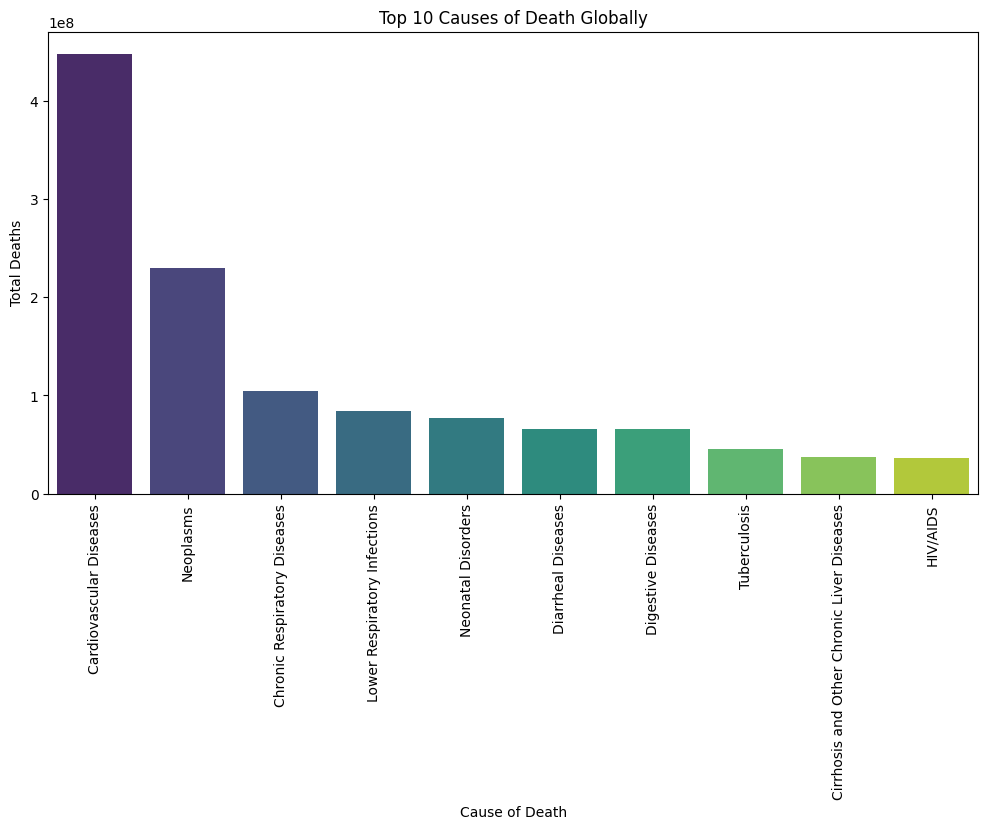

In [20]:
# Vẽ biểu đồ 10 nguyên nhân gây tử vong hàng đầu trên toàn cầu.
plt.figure(figsize=(12, 6))
sns.barplot(x=global_deaths.index[:10], y=global_deaths.values[:10], palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Causes of Death Globally')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.show()

C:\Users\tuan_anh\AppData\Local\Temp\ipykernel_11732\1172971303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_distribution.index, y=cause_distribution.values, palette="viridis")


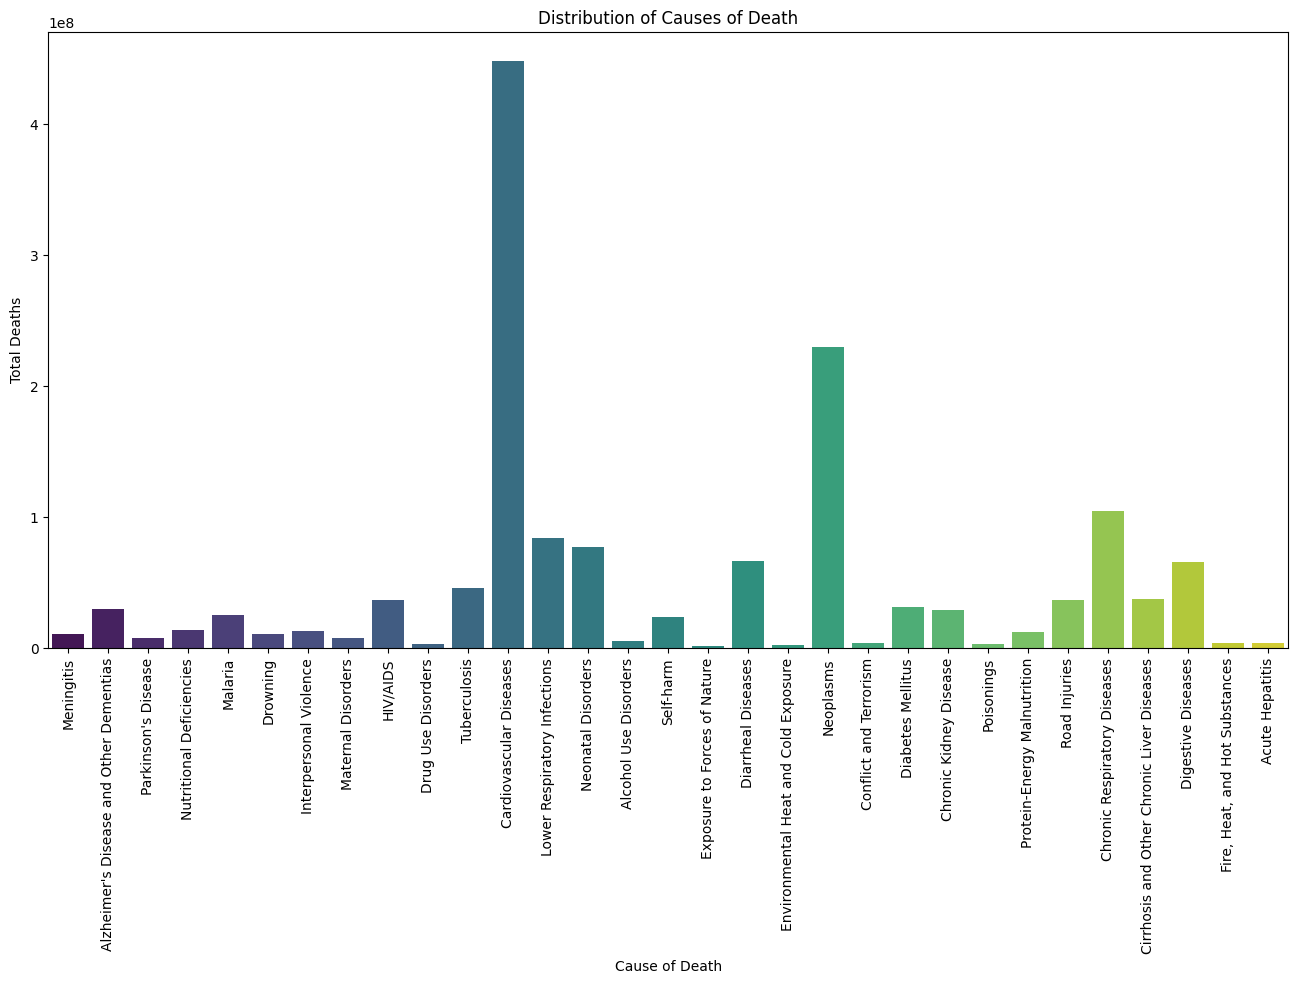

In [21]:
# Tính tổng số ca tử vong cho mỗi nguyên nhân gây tử vong.
cause_distribution = df.drop(columns=['Country/Territory', 'Year']).sum()

# phân bố các nguyên nhân gây tử vong
plt.figure(figsize=(16, 8))
sns.barplot(x=cause_distribution.index, y=cause_distribution.values, palette="viridis")
plt.title('Distribution of Causes of Death')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Nhóm theo 'Country/Territory' and 'Year' để phân tích khu vực
regional_deaths = df.groupby(['Country/Territory', 'Year']).sum().reset_index()
print(regional_deaths.head())

  Country/Territory  Year  Meningitis  \
0       Afghanistan  1990        2159   
1       Afghanistan  1991        2218   
2       Afghanistan  1992        2475   
3       Afghanistan  1993        2812   
4       Afghanistan  1994        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  \
0                      2087       93      1370                    1538   
1                      2153      189      1391                    2001   
2                      2441      239      1514                    2299   
3                      2837      108      1687        

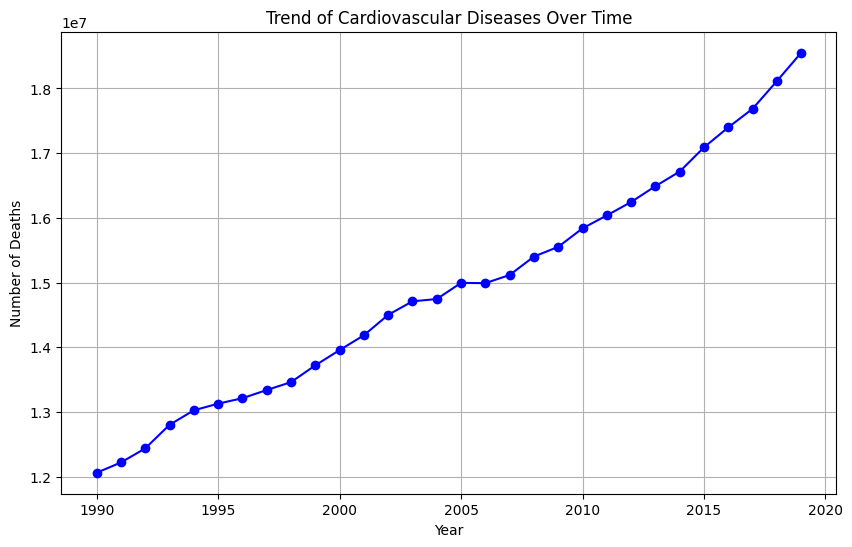

In [23]:
# Nhóm theo Năm và tổng hợp số ca tử vong do Bệnh Tim Mạch.
yearly_cardiovascular = df.groupby('Year')['Cardiovascular Diseases'].sum()

#Vẽ biểu đồ xu hướng của các bệnh tim mạch theo thời gian.
plt.figure(figsize=(10, 6))
plt.plot(yearly_cardiovascular.index, yearly_cardiovascular.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Cardiovascular Diseases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

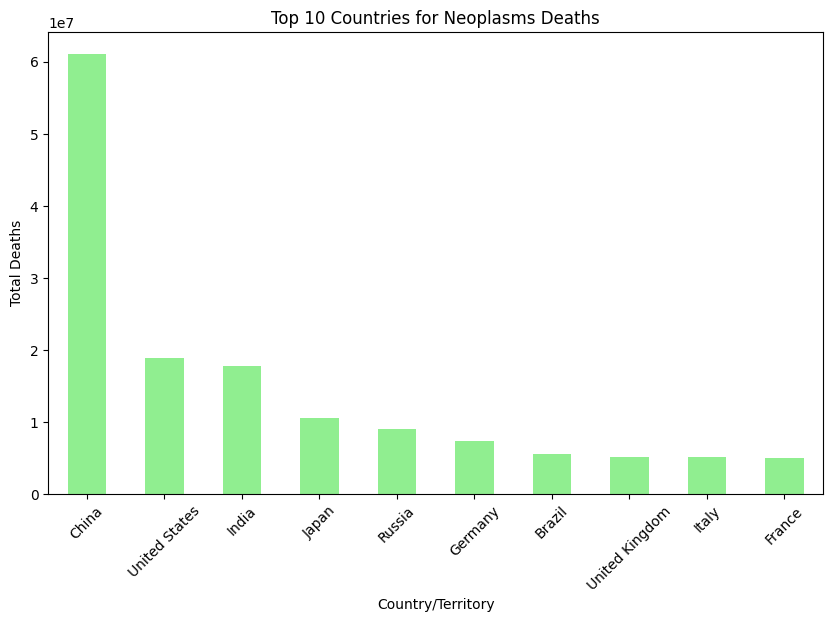

In [24]:
# Bệnh tiểu đường U bướu
top_countries = df.groupby('Country/Territory')["Neoplasms"].sum().sort_values(ascending=False).head(10)

# Vẽ biểu đồ 10 quốc gia hàng đầu về nguyên nhân gây tử vong đó.
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='lightgreen')
plt.title(f'Top 10 Countries for Neoplasms Deaths')
plt.xlabel('Country/Territory')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

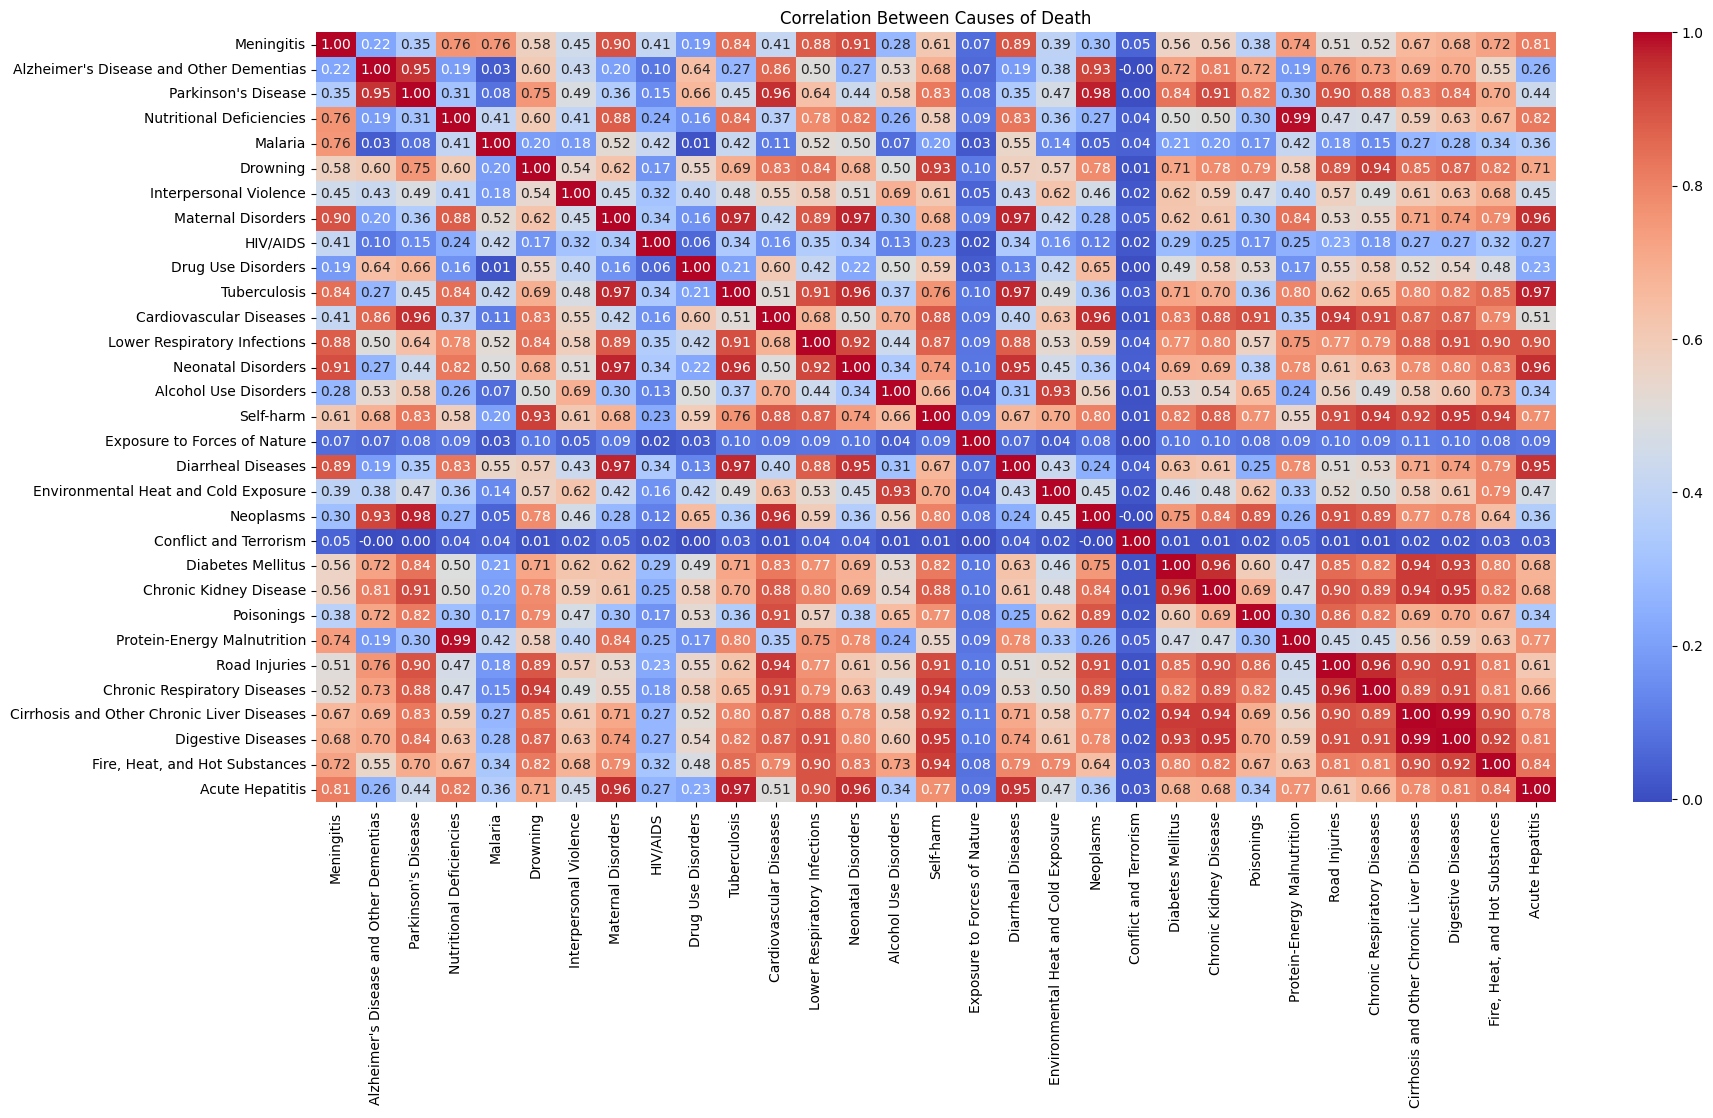

In [25]:
# Hình ảnh hóa nâng cao
#Bản đồ nhiệt của các mối tương quan nguyên nhân gây tử vong
plt.figure(figsize=(20, 10))
correlation_matrix = df.iloc[:, 2:].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Between Causes of Death')
plt.show()

<Figure size 1500x1000 with 0 Axes>

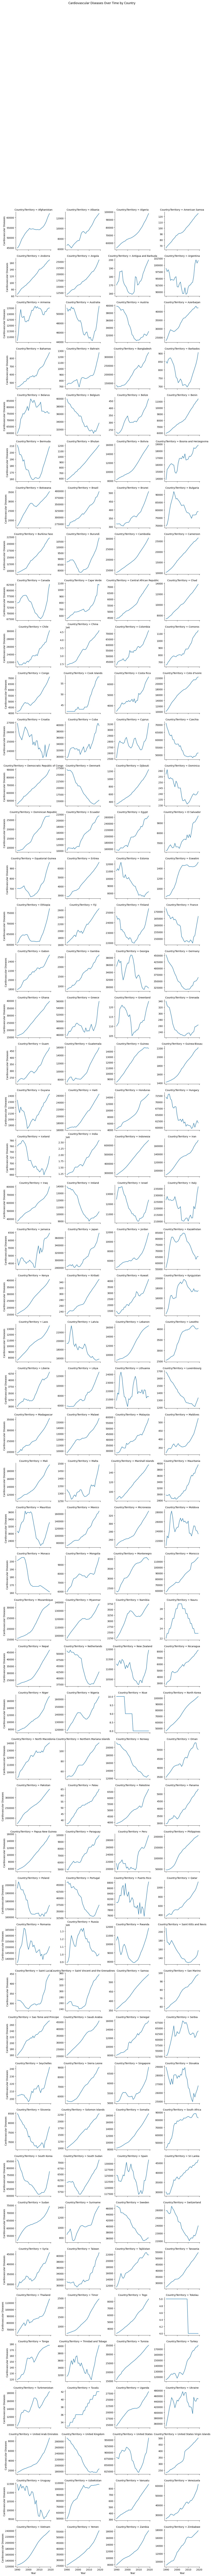

In [26]:
# Lưới Facet cho Phân tích Đa chiều về Nguyên nhân Tử vong theo Thời gian theo Quốc gia
plt.figure(figsize=(15, 10))

# Tạo lưới facet với seaborn
g = sns.FacetGrid(regional_deaths, col="Country/Territory", col_wrap=4, height=3, sharey=False)
g.map(sns.lineplot, "Year", "Cardiovascular Diseases")  # (Thay đổi sang các nguyên nhân khác).

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Cardiovascular Diseases Over Time by Country')
plt.show()

Dự đoán hồi quy tuyến tính về số ca tử vong do bệnh tim mạch

In [27]:
forecast_data = df.groupby('Year')['Cardiovascular Diseases'].sum().reset_index()
x= forecast_data['Year'].values.reshape(-1,1)
y= forecast_data['Cardiovascular Diseases'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

In [28]:
def plot_predictions(X, y, X_test, y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, color= 'blue', label='Actual Data')
    plt.plot( X_test, y_pred,color= 'red', linewidth=2, label=f'{model_name} prediction')
    plt.title(f'{model_name} - Forecast of Cardiovascular Diseases Deaths')
    plt.xlabel('Year')
    plt.ylabel('Number of Deaths')
    plt.legend()
    plt.grid(True)
    plt.show()

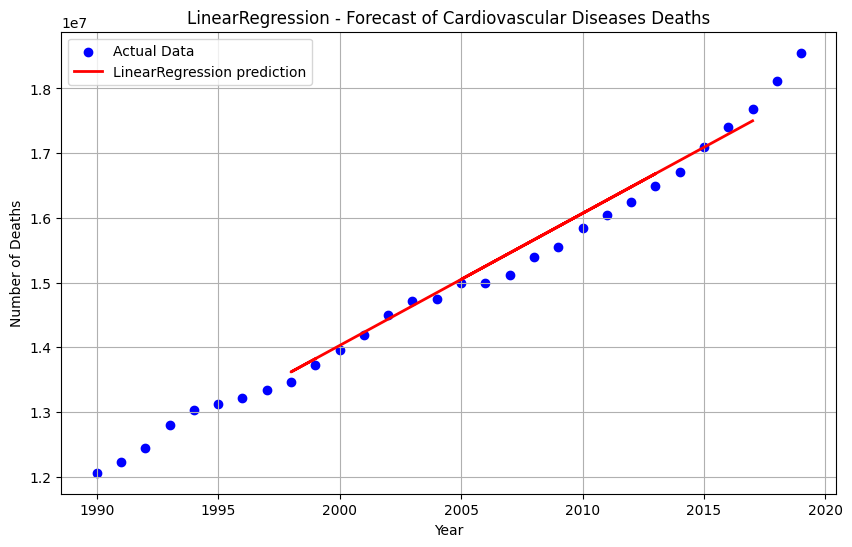

In [37]:
plot_predictions(x, y, x_test, y_test, y_pred_linear ,'LinearRegression' )

In [29]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression - MSE :{mse_linear}, R-squard :{r2_linear}')

Linear Regression - MSE :37606101782.926506, R-squard :0.9827637766379665


Dự đoán tử vong do bệnh tim mạch bằng hồi quy đa thức (bậc 3)

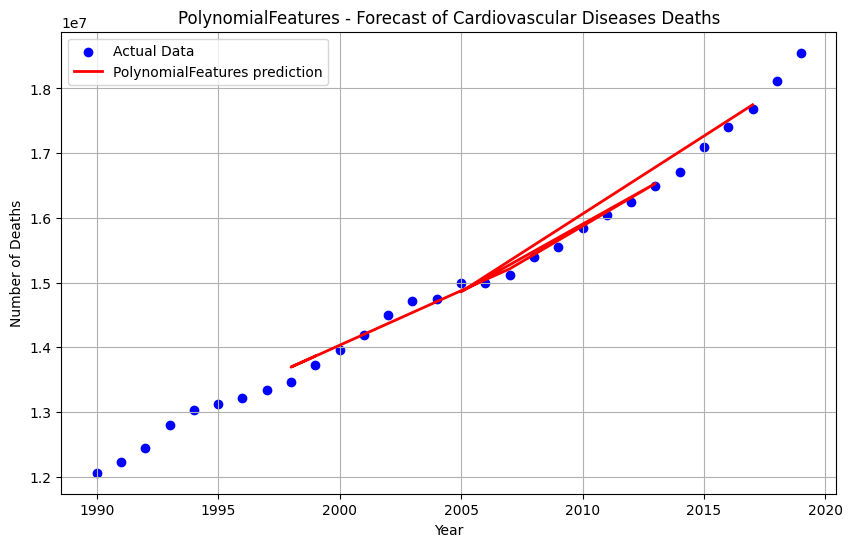

In [30]:
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x_train)
x_test_poly= poly_features.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)
plot_predictions(x, y, x_test, y_test, y_pred_poly, 'PolynomialFeatures' )

Một mô hình đặc trưng đa thức dự đoán số ca tử vong do bệnh tim mạch theo thời gian.

In [31]:
mse_poly = mean_squared_error(y_test,  y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression - MSE :{mse_poly}, R-squard :{r2_poly}')

Polynomial Regression - MSE :18163550583.353, R-squard :0.9916749942147846


Dự đoán tử vong do bệnh tim mạch bằng hồi quy Ridge

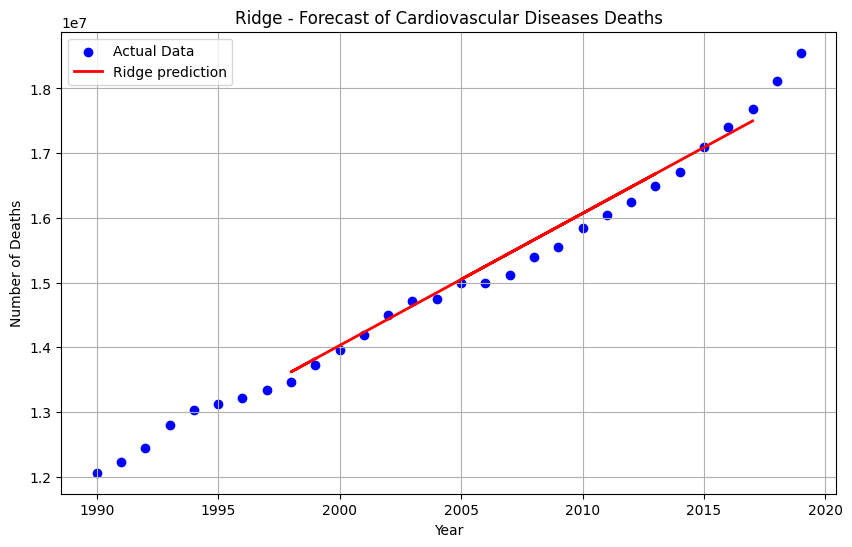

In [32]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)
plot_predictions(x, y, x_test, y_test, y_pred_ridge, 'Ridge' )